In [6]:
!pip install ckonlpy

ERROR: Could not find a version that satisfies the requirement ckonlpy (from versions: none)
ERROR: No matching distribution found for ckonlpy


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import konlpy.tag as twitter

%matplotlib inline
plt.rc('font', family='Malgun Gothic')

from konlpy.tag import Twitter
from wordcloud import WordCloud
from ckonlpy.tag import Twitter
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import re
import numpy as np
from PIL import Image

ModuleNotFoundError: No module named 'ckonlpy'

In [160]:
path = r'C:/Users/user/Desktop/플젝용_데이터/설문조사/'
df_이용자 = pd.read_csv(path + '이용자_colname변경.csv', encoding = 'CP949', index_col = False)
print(df_이용자.shape)
print(df_이용자.columns)
df_이용자.head()

(107, 28)
Index(['Unnamed: 0', '작성일시', '성별', '연령', '3. 자동차 운전면허가 있으십니까? ', '면허취득기간',
       '무면허이용', 'PM실제이용기간', 'PM얼마나자주', '평균주행시간', 'PM이용목적', 'PM사고', 'PM사고횟수',
       'PM사고원인', 'PM사고위치', 'PM아차사고', 'PM아차사고횟수', 'PM아차사고원인', 'PM아차사고위치',
       'PM주이용도로', 'PM주이용도로_이유', 'PM주이용도로_반대이유', 'PM개선사항', 'PM전용도로찬/반',
       '전용도로찬/반_이유', '전용도로위치', '전용도로위치_이유', '추가의견'],
      dtype='object')


,Unnamed: 0,작성일시,성별,연령,3. 자동차 운전면허가 있으십니까?,면허취득기간,무면허이용,PM실제이용기간,PM얼마나자주,평균주행시간,...,PM아차사고위치,PM주이용도로,PM주이용도로_이유,PM주이용도로_반대이유,PM개선사항,PM전용도로찬/반,전용도로찬/반_이유,전용도로위치,전용도로위치_이유,추가의견
0,1,12-1-2021 17:48:49,남자,25세,예,5.0,예,6개월 이상 ~ 1년 미만,주 1회 미만,5,...,차도,보도(인도),인도가 편해서,차도는 위험해서 잘 안다니게 됩니다,"도로/보도 환경 개선, 운영방식 개선 (방치 PM 즉시수거 등)",찬성,인도와 차도 모두 위험성이 있으므로 새로운 도로가필요함,차도,인도에는 자리가 없을듯,.
1,2,12-1-2021 18:17:42,남자,20세,아니오,0.0,예,1개월 이상 ~ 6개월 미만,주 1 ~ 2회,10,...,NaN,보도(인도),인도가 타기 편해서,차도는 위험하니깐?,"도로/보도 환경 개선, 운영방식 개선 (방치 PM 즉시수거 등)",반대,지금도 편하게 타고있는데 굳이 만들어야하나 싶음,차도,인도에는 만들공간이 없을거같다,"전동킥보드 두명 타는거 제지하는거랑, 아무데나 주차하는건 문제라고 생각함.."
2,4,12-1-2021 20:40:32,여자,24세,아니오,0.0,예,6개월 이상 ~ 1년 미만,주 1 ~ 2회,25,...,NaN,보도(인도),차도는 위험하고 자전거도로는 많이 없어서,차도는 위험하고 자전거도로는 많이 없어서,"도로/보도 환경 개선, 대중교통 환승 연계",찬성,전용도로가 있다면 더 안전하고 편리할 것 같다.,보도(인도),차도는 사고가 날 위험이 더 높을 것 같다.,NaN
3,5,12-1-2021 22:30:59,남자,26세,예,6.0,예,1개월 미만,주 1회 미만,5,...,NaN,이면도로(골목길),정류장에 가기 위해,위험해서,"사고시 보험 문제 개선, 도로/보도 환경 개선",찬성,보도에서도 천천히 주행해야해서,차도,차도쪽이 그나마 나아보입니다,NaN
4,6,12-1-2021 23:03:51,여자,29세,예,5.0,아니오,1개월 미만,주 1회 미만,20,...,이면도로(골목길),자전거 전용도로,편함,도로는 오토바이가 험하게 다님,"사고시 보험 문제 개선, 도로/보도 환경 개선",찬성,차량과 자전거 사이라 도로 사용 힘듦,보도(인도),자전거도로처럼 생기면 좋을 것 같음,정차하는 규정 필요.인도중앙에 둬 노약자 부상 우려있음


In [161]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('',text)
    return result

In [162]:
def wordcloud(text):
    twitter = Twitter()
        
    twitter.add_dictionary('자전거전용도로', 'Noun')
    twitter.add_dictionary('PM전용도로', 'Noun')
    twitter.add_dictionary('이동수단', 'Noun')
    twitter.add_dictionary('필요', 'Noun')
    
    text_file = twitter.nouns(text)
    
    text_text_file = []
    for i in text_file:
        if len(i) == 1:
            continue
        else:
            text_text_file.append(i)
    
    stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
                 "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
        #사용하지 않을 단어 또는 문장 추가
    line = [i for i in text_text_file if i not in stop_word]
    
    tags = Counter(line).most_common()
    print(tags)
    
    
    wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="White",#colormap = "Accent_r" 
                      width=3000, height=2000)
    cloud = wc.generate_from_frequencies(dict(tags))
    
    plt.imshow(cloud) 
    plt.axis('off') 
    plt.show()

In [163]:
# 성별 전용도로 찬성/반대
df_이용자_남자 = df_이용자.loc[df_이용자['성별'] == '남자']
df_이용자_여자 = df_이용자.loc[df_이용자['성별'] == '여자']

In [164]:
남자찬성 = df_이용자_남자.loc[df_이용자_남자['PM전용도로찬/반'] == '찬성']
남자반대 = df_이용자_남자.loc[df_이용자_남자['PM전용도로찬/반'] == '반대']
여자찬성 = df_이용자_여자.loc[df_이용자_여자['PM전용도로찬/반'] == '찬성']
여자반대 = df_이용자_여자.loc[df_이용자_여자['PM전용도로찬/반'] == '반대']

In [165]:
남자찬성이유 = list()
for i in 남자찬성['전용도로찬/반_이유']:
    남자찬성이유.append(i)
남자찬성이유 = ''.join(남자찬성이유)
남자찬성이유 = text_cleaning(남자찬성이유)

In [166]:
text = 남자찬성['전용도로찬/반_이유']
text = ''.join(text)
twitter = Twitter()
text_file = twitter.morphs(text)

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [167]:
text_file 

['인도',
 '와',
 '차도',
 '모두',
 '위험성',
 '이',
 '있으므로',
 '새',
 '로운',
 '도로',
 '가필',
 '요',
 '함',
 '보도',
 '에서도',
 '천천히',
 '주행',
 '해',
 '야',
 '해서',
 '분명',
 '공유',
 '한',
 '다는',
 '점',
 '에서',
 '편리',
 '하고',
 '유용',
 '한',
 '이동수단',
 '임',
 '에는',
 '틀림',
 '없으나',
 '인프라',
 '가',
 '제대로',
 '갖춰',
 '지지',
 '않아',
 '이용',
 '에',
 '있',
 '어서',
 '고민',
 '된다',
 '.',
 '인프라',
 '가',
 '갖춰',
 '지고',
 '충분',
 '히',
 '안',
 '전하',
 '다',
 '고',
 '느낀다면',
 '이용',
 '하지',
 '않을',
 '이유',
 '가',
 '없다고',
 '생각',
 '한',
 '다',
 '.',
 '눈치',
 '가보',
 '임',
 '이용자',
 '편의',
 '와',
 '사고',
 '발생',
 '감소',
 '위험',
 '빨라',
 '봤자',
 '시속',
 '30',
 '키론데',
 '차로',
 '로',
 '가다',
 '보면',
 '차가',
 '뒤',
 '에서',
 '빵빵',
 '되서',
 '차도',
 '랑',
 '인도',
 '둘다',
 '위험',
 '한',
 '데',
 '따로',
 '다닐',
 '길이',
 '있으면',
 '편할거',
 '같',
 '기도',
 '함있으면',
 '좋겠다고',
 '생',
 '각하',
 '지만',
 '자전거',
 '전용도로',
 '의',
 '개선',
 '을',
 '통해',
 '서',
 '같이',
 '사용',
 '할',
 '수',
 '있을것',
 '같습니다',
 'ㅎㅎ',
 '위험',
 '도로',
 '에서는',
 '절대',
 '적',
 '약자',
 '이기',
 '때문',
 '에',
 '필',
 '요하',
 '다',
 '고',
 '생각',
 '합니다',
 '.',
 '안전',
 '장치',
 '가',


In [168]:
okt = Okt()
text_okt = Okt.morphs(text)
text_okt

TypeError: morphs() missing 1 required positional argument: 'phrase'

In [169]:
text_file

['인도',
 '와',
 '차도',
 '모두',
 '위험성',
 '이',
 '있으므로',
 '새',
 '로운',
 '도로',
 '가필',
 '요',
 '함',
 '보도',
 '에서도',
 '천천히',
 '주행',
 '해',
 '야',
 '해서',
 '분명',
 '공유',
 '한',
 '다는',
 '점',
 '에서',
 '편리',
 '하고',
 '유용',
 '한',
 '이동수단',
 '임',
 '에는',
 '틀림',
 '없으나',
 '인프라',
 '가',
 '제대로',
 '갖춰',
 '지지',
 '않아',
 '이용',
 '에',
 '있',
 '어서',
 '고민',
 '된다',
 '.',
 '인프라',
 '가',
 '갖춰',
 '지고',
 '충분',
 '히',
 '안',
 '전하',
 '다',
 '고',
 '느낀다면',
 '이용',
 '하지',
 '않을',
 '이유',
 '가',
 '없다고',
 '생각',
 '한',
 '다',
 '.',
 '눈치',
 '가보',
 '임',
 '이용자',
 '편의',
 '와',
 '사고',
 '발생',
 '감소',
 '위험',
 '빨라',
 '봤자',
 '시속',
 '30',
 '키론데',
 '차로',
 '로',
 '가다',
 '보면',
 '차가',
 '뒤',
 '에서',
 '빵빵',
 '되서',
 '차도',
 '랑',
 '인도',
 '둘다',
 '위험',
 '한',
 '데',
 '따로',
 '다닐',
 '길이',
 '있으면',
 '편할거',
 '같',
 '기도',
 '함있으면',
 '좋겠다고',
 '생',
 '각하',
 '지만',
 '자전거',
 '전용도로',
 '의',
 '개선',
 '을',
 '통해',
 '서',
 '같이',
 '사용',
 '할',
 '수',
 '있을것',
 '같습니다',
 'ㅎㅎ',
 '위험',
 '도로',
 '에서는',
 '절대',
 '적',
 '약자',
 '이기',
 '때문',
 '에',
 '필',
 '요하',
 '다',
 '고',
 '생각',
 '합니다',
 '.',
 '안전',
 '장치',
 '가',


In [170]:
tags = Counter(text_file).most_common()
tags

[('가', 15),
 ('을', 11),
 ('한', 9),
 ('위험', 9),
 ('와', 8),
 ('이', 7),
 ('도로', 7),
 ('에', 7),
 ('다', 7),
 ('의', 7),
 ('인도', 6),
 ('.', 6),
 ('사고', 6),
 ('안전', 6),
 (',', 6),
 ('차도', 5),
 ('이용', 5),
 ('전용도로', 5),
 ('수', 5),
 ('때문', 5),
 ('보행자', 5),
 ('사용자', 5),
 ('해서', 4),
 ('자전거', 4),
 ('할', 4),
 ('에게', 4),
 ('것', 4),
 ('보임', 4),
 ('모두', 3),
 ('고', 3),
 ('생각', 3),
 ('이용자', 3),
 ('로', 3),
 ('지만', 3),
 ('하기', 3),
 ('차량', 3),
 ('으로', 3),
 ('통행', 3),
 ('방해', 3),
 ('위해', 3),
 ('위험성', 2),
 ('요', 2),
 ('함', 2),
 ('주행', 2),
 ('해', 2),
 ('에서', 2),
 ('편리', 2),
 ('임', 2),
 ('인프라', 2),
 ('갖춰', 2),
 ('있', 2),
 ('전하', 2),
 ('하지', 2),
 ('이유', 2),
 ('눈치', 2),
 ('가보', 2),
 ('다닐', 2),
 ('생', 2),
 ('각하', 2),
 ('서', 2),
 ('같이', 2),
 ('필', 2),
 ('요하', 2),
 ('합니다', 2),
 ('장치', 2),
 ('없', 2),
 ('다시피', 2),
 ('오토바이', 2),
 ('비슷하게', 2),
 ('큰', 2),
 ('부상', 2),
 ('입', 2),
 ('우려', 2),
 ('큼', 2),
 ('생기', 2),
 ('면', 2),
 ('pm', 2),
 ('운행', 2),
 ('자', 2),
 ('편안', 2),
 ('환경', 2),
 ('제공', 2),
 ('있을', 2),
 ('기', 2),
 ('는',

In [171]:
text_text_file = []
for i in text_file:
    if len(i) == 1:
        pass
    else:
        text_text_file.append(i)

In [172]:
text_text_file

['인도',
 '차도',
 '모두',
 '위험성',
 '있으므로',
 '로운',
 '도로',
 '가필',
 '보도',
 '에서도',
 '천천히',
 '주행',
 '해서',
 '분명',
 '공유',
 '다는',
 '에서',
 '편리',
 '하고',
 '유용',
 '이동수단',
 '에는',
 '틀림',
 '없으나',
 '인프라',
 '제대로',
 '갖춰',
 '지지',
 '않아',
 '이용',
 '어서',
 '고민',
 '된다',
 '인프라',
 '갖춰',
 '지고',
 '충분',
 '전하',
 '느낀다면',
 '이용',
 '하지',
 '않을',
 '이유',
 '없다고',
 '생각',
 '눈치',
 '가보',
 '이용자',
 '편의',
 '사고',
 '발생',
 '감소',
 '위험',
 '빨라',
 '봤자',
 '시속',
 '30',
 '키론데',
 '차로',
 '가다',
 '보면',
 '차가',
 '에서',
 '빵빵',
 '되서',
 '차도',
 '인도',
 '둘다',
 '위험',
 '따로',
 '다닐',
 '길이',
 '있으면',
 '편할거',
 '기도',
 '함있으면',
 '좋겠다고',
 '각하',
 '지만',
 '자전거',
 '전용도로',
 '개선',
 '통해',
 '같이',
 '사용',
 '있을것',
 '같습니다',
 'ㅎㅎ',
 '위험',
 '도로',
 '에서는',
 '절대',
 '약자',
 '이기',
 '때문',
 '요하',
 '생각',
 '합니다',
 '안전',
 '장치',
 '다시피',
 '하기',
 '때문',
 '오토바이',
 '사고',
 '비슷하게',
 '부상',
 '우려',
 '전용도로',
 '생기',
 '보행자',
 'pm',
 '이용자',
 '차량',
 '운행',
 '모두',
 '에게',
 '편안',
 '도로',
 '환경',
 '제공',
 '있을',
 '으로',
 '보임',
 '점차',
 '용량',
 '많아져',
 '위험',
 '아지',
 '때문',
 '자전거전용도로',
 '처럼',
 '안전',
 '이용',
 '보장',
 '차도',
 '차

In [173]:
tags = Counter(text_file).most_common()

[('위험', 9), ('사고', 6), ('안전', 6), ('차도', 5), ('전용도로', 5), ('때문', 5), ('보행자', 5), ('사용자', 5), ('자전거', 4), ('보임', 4), ('모두', 3), ('이용자', 3), ('차량', 3), ('통행', 3), ('방해', 3), ('위험성', 2), ('주행', 2), ('편리', 2), ('인프라', 2), ('전하', 2), ('이유', 2), ('눈치', 2), ('가보', 2), ('각하', 2), ('요하', 2), ('장치', 2), ('다시피', 2), ('오토바이', 2), ('부상', 2), ('우려', 2), ('생기', 2), ('운행', 2), ('편안', 2), ('환경', 2), ('제공', 2), ('일반', 2), ('무작정', 2), ('필요', 2), ('보도', 1), ('분명', 1), ('공유', 1), ('유용', 1), ('이동수단', 1), ('틀림', 1), ('제대로', 1), ('지지', 1), ('어서', 1), ('고민', 1), ('지고', 1), ('충분', 1), ('편의', 1), ('발생', 1), ('감소', 1), ('시속', 1), ('키론데', 1), ('차로', 1), ('빵빵', 1), ('길이', 1), ('기도', 1), ('개선', 1), ('통해', 1), ('사용', 1), ('절대', 1), ('약자', 1), ('이기', 1), ('점차', 1), ('용량', 1), ('아지', 1), ('자전거전용도로', 1), ('보장', 1), ('사람', 1), ('그나', 1), ('마저', 1), ('거의', 1), ('현실', 1), ('필요성', 1), ('서위', 1), ('다그', 1), ('진로', 1), ('존재', 1), ('자체', 1), ('위화', 1), ('유발', 1), ('실력', 1), ('보완', 1), ('다분', 1), ('대한', 1), ('해결', 1), ('그냥', 1)

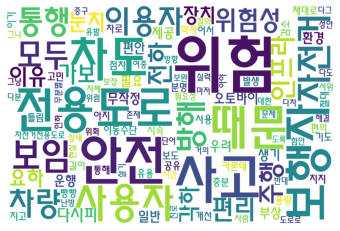

In [174]:
wordcloud(남자찬성이유)

In [175]:
df_이용자.columns

Index(['Unnamed: 0', '작성일시', '성별', '연령', '3. 자동차 운전면허가 있으십니까? ', '면허취득기간',
       '무면허이용', 'PM실제이용기간', 'PM얼마나자주', '평균주행시간', 'PM이용목적', 'PM사고', 'PM사고횟수',
       'PM사고원인', 'PM사고위치', 'PM아차사고', 'PM아차사고횟수', 'PM아차사고원인', 'PM아차사고위치',
       'PM주이용도로', 'PM주이용도로_이유', 'PM주이용도로_반대이유', 'PM개선사항', 'PM전용도로찬/반',
       '전용도로찬/반_이유', '전용도로위치', '전용도로위치_이유', '추가의견'],
      dtype='object')

In [176]:
찬성 = df_이용자.loc[df_이용자['PM전용도로찬/반'] == '찬성']['전용도로찬/반_이유']
반대 = df_이용자.loc[df_이용자['PM전용도로찬/반'] == '반대']['전용도로찬/반_이유']

In [177]:
from konlpy.tag import Kkma, Komoran, Okt, Hannanum 

In [178]:
okt = Okt()
kkma = Kkma()
komoran = Komoran()
hannanum = Hannanum()

In [179]:
찬성 = ''.join(찬성)

In [180]:
kkma.morphs(찬성)

['인도',
 '와',
 '차도',
 '모두',
 '위험성',
 '이',
 '있',
 '으므로',
 '새롭',
 'ㄴ',
 '도로',
 '가',
 '필요',
 '하',
 'ㅁ',
 '전',
 '용도',
 '로',
 '가',
 '아',
 '있',
 '다면',
 '더',
 '안전',
 '하',
 '고',
 '편리',
 '하',
 'ㄹ',
 '것',
 '같',
 '다',
 '.',
 '보도',
 '에서',
 '도',
 '천천히',
 '주행',
 '하',
 '어야',
 '하',
 '어서',
 '차량',
 '과',
 '자전거',
 '사',
 '이',
 '라',
 '도로',
 '사용',
 '힘들',
 'ㅁ',
 '분',
 '명',
 '공',
 '유하',
 'ㄴ다는',
 '점',
 '에서',
 '편리',
 '하',
 '고',
 '유용',
 '하',
 'ㄴ',
 '이동',
 '수단',
 '임',
 '에',
 '는',
 '틀림없',
 '으나',
 '인프라',
 '가',
 '제대로',
 '갖추',
 '어',
 '지',
 '지',
 '않',
 '아',
 '이용',
 '에',
 '있',
 '어서',
 '고민',
 '되',
 'ㄴ다',
 '.',
 '인프라',
 '가',
 '갖추',
 '어',
 '지',
 '고',
 '충분히',
 '안전',
 '하다',
 '이',
 '고',
 '느끼',
 'ㄴ다면',
 '이용',
 '하',
 '지',
 '않',
 '을',
 '이유',
 '가',
 '없다',
 '고',
 '생각',
 '하',
 'ㄴ다',
 '.',
 '눈치',
 '가',
 '보임',
 '이용자',
 '편의',
 '와',
 '사고',
 '발생',
 '감소',
 '많',
 '은',
 '사람',
 '들',
 '이',
 '이용',
 '하',
 '고',
 '대중화',
 '되',
 'ㅁ',
 '에',
 '따르',
 '아',
 '필요',
 '하',
 'ㄹ',
 '것',
 '같',
 '다',
 '위험',
 '빻',
 'ㄹ라',
 '보',
 '았',
 '자',
 '시',
 '속',
 '30',
 '키

In [181]:
print("[Kkma morphs 함수]")
찬성1 = kkma.morphs(찬성)
print(kkma.morphs(찬성))

print("[Okt 함수]")
찬성2 = okt.morphs(찬성)
print(okt.morphs(찬성))

print("[Komoran 함수]")
찬성3 = komoran.morphs(찬성)
print(komoran.morphs(찬성))

print("[Hannanum 함수]")
찬성4 = hannanum.morphs(찬성)
print(hannanum.morphs(찬성))

[Kkma morphs 함수]
['인도', '와', '차도', '모두', '위험성', '이', '있', '으므로', '새롭', 'ㄴ', '도로', '가', '필요', '하', 'ㅁ', '전', '용도', '로', '가', '아', '있', '다면', '더', '안전', '하', '고', '편리', '하', 'ㄹ', '것', '같', '다', '.', '보도', '에서', '도', '천천히', '주행', '하', '어야', '하', '어서', '차량', '과', '자전거', '사', '이', '라', '도로', '사용', '힘들', 'ㅁ', '분', '명', '공', '유하', 'ㄴ다는', '점', '에서', '편리', '하', '고', '유용', '하', 'ㄴ', '이동', '수단', '임', '에', '는', '틀림없', '으나', '인프라', '가', '제대로', '갖추', '어', '지', '지', '않', '아', '이용', '에', '있', '어서', '고민', '되', 'ㄴ다', '.', '인프라', '가', '갖추', '어', '지', '고', '충분히', '안전', '하다', '이', '고', '느끼', 'ㄴ다면', '이용', '하', '지', '않', '을', '이유', '가', '없다', '고', '생각', '하', 'ㄴ다', '.', '눈치', '가', '보임', '이용자', '편의', '와', '사고', '발생', '감소', '많', '은', '사람', '들', '이', '이용', '하', '고', '대중화', '되', 'ㅁ', '에', '따르', '아', '필요', '하', 'ㄹ', '것', '같', '다', '위험', '빻', 'ㄹ라', '보', '았', '자', '시', '속', '30', '키론', '데', '차로', '로', '가다', '보', '면', '차가', '뒤', '에서', '빵빵', '되', '어', '스', '어', '차도', '랑', '인도', '둘', '다', '위험', '하', 'ㄴ', '데', '따로', '다니

['인도', '와', '차', '도', '모두', '위험성', '이', '있', '으므로', '새롭', '은', '도로가필요함전용도로', '가', '있', '다면', '더', '알', 'ㄴ', '전', '하고', '편리', '하', 'ㄹ', '것', '같', '다', '.', '보도', '에서도', '천천히', '주행해야해서차량', '과', '자전거', '사이', '이', '라', '도', '로', '사용', '힘듦분명', '공유', '하', 'ㄴ다는', '점', '에서', '편리', '하고', '유용', '하', 'ㄴ', '이동수단', '이', 'ㅁ', '에는', '틀림없', '으나', '인프라', '가', '제대로', '갖추', '어', '지', '지', '않', '아', '이용', '에', '있', '어서', '고민', '되', 'ㄴ다', '.', '인프라', '가', '갖추', '어', '지', '고', '충분히', '안전', '하', '다', '고', '느끼', 'ㄴ다면', '이용', '하', '지', '않', '을', '이유', '가', '없', '다', '고', '생각', '하', 'ㄴ다', '.', '눈치가보', '이', 'ㅁ', '이용자', '편의', '와', '사', '고', '발생', '감소많은', '사람', '들', '이', '이용', '하고', '대중화됨', '에', '따르', '아', '필요', '하', 'ㄹ', '것', '같다위험빨라봤자', '시속30키론데', '차로로가다보', '이', '면', '차', '가', '뒤', '에서', '빵빵되서차도랑', '인도', '둘다', '위험한데', '따로', '다니', 'ㄹ', '길', '이', '있', '으면', '편할거같기', '도', '함', '있', '으면', '좋', '겠다', '고', '생각', '하', '지', '말', 'ㄴ', '자전거', '전용도로', '의', '개선', '을', '통하', '어서', '같', '이', '사용', '하', 'ㄹ', '수', '있', '을', '것'

In [182]:
#### .nouns()함수: 명사를 추출 ####
print("[Kkma nouns 함수]")
print(kkma.nouns(text))
print("[OKt nouns 함수]")
print(okt.nouns(text))
print("[Komoran nouns 함수]")
print(komoran.nouns(text))
print("[Hannanum nouns 함수]")
print(hannanum.nouns(text))

[Kkma nouns 함수]
['인도', '차도', '모두', '위험성', '도로', '필요', '함보', '주행', '공유', '점', '편리', '유용', '이동', '이동수단임', '수단', '임', '인프라', '이용', '고민', '안전', '안전하다', '하다', '이유', '생각', '눈치', '보임', '이용자', '편의', '사고', '발생', '감소', '감소위험', '위험', '시', '시속30키론', '속', '30', '키론', '데', '차로', '차가', '뒤', '둘', '데', '길', '거', '함', '자전거', '전용', '전용도로', '개선', '사용', '수', '위험도로', '절대적', '약자', '때문', '필요하다', '안전장치', '장치', '오토바이', '오토바이사고', '부상', '입', '우려', '보행자', '차량', '운', '운행자', '행자', '편안', '환경', '제공', '보임점차', '점차', '사용량', '위험도', '때문자전거전용도로', '보장', '보장차도', '차량통행', '통행', '방해', '사람', '곳', '현실', '일반', '생각하다전용도로', '필요성', '위험하다', '있음', '사용자', '사용자보행자', '진로', '존재', '자체', '위화감', '유발', '주행실력', '실력', '보완', '보완사고', '해결책', '차', '통행문제', '문제', '상태', '중요', '때문무작정', '무작정', '막지', '편리성', '편리성안전', '호', '호가보', '가보', '보임안전장치', '보임무작정', '킥', '킥라니', '라니', '단어', '일반차도', '보임반대', '반대', '위', '위럼', '럼', '방향', '자전거도로', '미', '미사용자', '필요함인도로', '함인', '위험하다도보', '도보', '위험시간절약', '시간', '절약', '중구난방', '다님', '다님사용자']
[OKt nouns 함수]
['인도', '차도', '모두', '위험성',

In [183]:
print("[Okt phrases 함수]")
print(okt.phrases(찬성))

[Okt phrases 함수]
['인도', '인도와 차도', '인도와 차도 모두', '인도와 차도 모두 위험성', '새로운 도로', '도로', '있다면 더', '편리할 것', '보도', '주행', '차량', '차량과 자전거', '차량과 자전거 사이', '도로 사용', '분명', '분명 공유한다는', '분명 공유한다는 점', '유용한 이동수단임', '인프라', '제대로', '이용', '고민', '이유', '생각', '눈치', '보임', '보임 이용자', '보임 이용자 편의', '보임 이용자 편의와 사고', '보임 이용자 편의와 사고 발생', '보임 이용자 편의와 사고 발생 감소', '대중화', '필요할 것', '위험', '시속30키론데', '시속30키론데 차로', '빵빵', '차도', '길이', '자전거', '자전거 전용도로', '자전거 전용도로의 개선', '통해', '사용', '사용할 수', '차로', '인도 통행', '위험도로', '절대적 약자이기', '절대적 약자이기 때문', '안전장치가', '때문', '오토바이사고', '부상', '우려', '전용도로', '생기', '보행자', 'pm이용자', '차량 운행자', '차량 운행자 모두', '편안한 도로', '편안한 도로 환경', '제공', '제공할 수', '제공할 수 있을 것', '보임점차', '보임점차 사용량', '위험도', '때문차도', '때문차도 우측', '때문차도 우측 가장자리', 'pm', '이용하기엔 어려움', '따라서', '따라서 자전거', '따라서 자전거 도로', 'pm전용도로', '생각자전거전용도로', '안전한 이용', '안전한 이용 보장차도', '차량통행', '방해', '사람', '사람의 통행', '만한곳', '자전거 도로', '그 자전거', '그 자전거 도로', '거의', '거의없는 것', '현실일반차도', '사고', 'pm 이용자', 'pm 이용자와 보행자', 'pm 이용자와 보행자 모두', '도로 필요성', '마찬가지', '많은 사용자보행자', '많은 사용자보행자의 진로', '많은 사용자

In [184]:
text = 찬성

[('인도와 차도', 1), ('인도와 차도 모두', 1), ('인도와 차도 모두 위험성', 1), ('새로운 도로', 1), ('있다면 더', 1), ('편리할 것', 1), ('보도', 1), ('주행', 1), ('차량', 1), ('차량과 자전거', 1), ('차량과 자전거 사이', 1), ('도로 사용', 1), ('분명', 1), ('분명 공유한다는', 1), ('분명 공유한다는 점', 1), ('유용한 이동수단임', 1), ('인프라', 1), ('제대로', 1), ('고민', 1), ('이유', 1), ('눈치', 1), ('보임', 1), ('보임 이용자', 1), ('보임 이용자 편의', 1), ('보임 이용자 편의와 사고', 1), ('보임 이용자 편의와 사고 발생', 1), ('보임 이용자 편의와 사고 발생 감소', 1), ('대중화', 1), ('필요할 것', 1), ('위험', 1), ('시속30키론데', 1), ('시속30키론데 차로', 1), ('빵빵', 1), ('차도', 1), ('길이', 1), ('자전거', 1), ('자전거 전용도로', 1), ('자전거 전용도로의 개선', 1), ('통해', 1), ('사용', 1), ('사용할 수', 1), ('차로', 1), ('인도 통행', 1), ('위험도로', 1), ('절대적 약자이기', 1), ('절대적 약자이기 때문', 1), ('안전장치가', 1), ('때문', 1), ('오토바이사고', 1), ('부상', 1), ('우려', 1), ('전용도로', 1), ('생기', 1), ('보행자', 1), ('pm이용자', 1), ('차량 운행자', 1), ('차량 운행자 모두', 1), ('편안한 도로', 1), ('편안한 도로 환경', 1), ('제공', 1), ('제공할 수', 1), ('제공할 수 있을 것', 1), ('보임점차', 1), ('보임점차 사용량', 1), ('위험도', 1), ('때문차도', 1), ('때문차도 우측', 1), ('때문차도 우측 가장자리', 1)

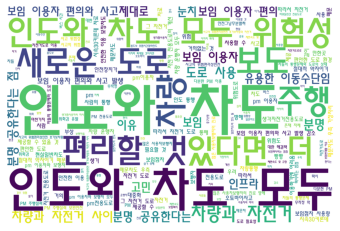

In [185]:
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = okt.phrases(text)
    
text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="White",#colormap = "Accent_r" 
                  width=3000, height=2000)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()

[('위험', 15), ('어서', 13), ('안전', 12), ('전용', 11), ('자전거', 9), ('차도', 8), ('필요', 7), ('하다', 7), ('사고', 7), ('보행자', 6), ('차량', 5), ('보임', 5), ('다니', 5), ('때문', 5), ('pm', 5), ('사용자', 5), ('모두', 4), ('이용자', 4), ('으면', 4), ('통행', 4), ('생기', 4), ('PM', 4), ('어야', 3), ('사용', 3), ('갖추', 3), ('ㄴ다', 3), ('위험도', 3), ('방해', 3), ('시간', 3), ('많이', 3), ('위하', 3), ('위험성', 2), ('편리', 2), ('주행', 2), ('힘들', 2), ('인프라', 2), ('느끼', 2), ('ㄴ다면', 2), ('이유', 2), ('눈치', 2), ('발생', 2), ('사람', 2), ('따르', 2), ('차로', 2), ('편하', 2), ('같이', 2), ('ㅂ니다', 2), ('다시피', 2), ('오토바이', 2), ('비슷', 2), ('부상', 2), ('우려', 2), ('행자', 2), ('편안', 2), ('환경', 2), ('제공', 2), ('있음', 2), ('ㄴ다고', 2), ('일반', 2), ('달리', 2), ('택시비', 2), ('점점', 2), ('오르', 2), ('버스', 2), ('애매', 2), ('보다', 2), ('으니깐', 2), ('무작정', 2), ('막지', 2), ('너무', 2), ('으므로', 1), ('새롭', 1), ('용도', 1), ('다면', 1), ('보도', 1), ('천천히', 1), ('유하', 1), ('ㄴ다는', 1), ('유용', 1), ('이동', 1), ('수단', 1), ('틀림없', 1), ('으나', 1), ('제대로', 1), ('고민', 1), ('충분히', 1), ('없다', 1), ('편의', 1), ('감소'

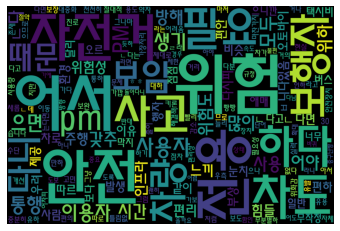

In [186]:
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = kkma.morphs(text)

text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="black",#colormap = "Accent_r" 
                  width=3000, height=2000)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()

[Hannanum 함수]
['인도', '와', '차', '도', '모두', '위험성', '이', '있', '으므로', '새롭', '은', '도로가필요함전용도로', '가', '있', '다면', '더', '알', 'ㄴ', '전', '하고', '편리', '하', 'ㄹ', '것', '같', '다', '.', '보도', '에서도', '천천히', '주행해야해서차량', '과', '자전거', '사이', '이', '라', '도', '로', '사용', '힘듦분명', '공유', '하', 'ㄴ다는', '점', '에서', '편리', '하고', '유용', '하', 'ㄴ', '이동수단', '이', 'ㅁ', '에는', '틀림없', '으나', '인프라', '가', '제대로', '갖추', '어', '지', '지', '않', '아', '이용', '에', '있', '어서', '고민', '되', 'ㄴ다', '.', '인프라', '가', '갖추', '어', '지', '고', '충분히', '안전', '하', '다', '고', '느끼', 'ㄴ다면', '이용', '하', '지', '않', '을', '이유', '가', '없', '다', '고', '생각', '하', 'ㄴ다', '.', '눈치가보', '이', 'ㅁ', '이용자', '편의', '와', '사', '고', '발생', '감소많은', '사람', '들', '이', '이용', '하고', '대중화됨', '에', '따르', '아', '필요', '하', 'ㄹ', '것', '같다위험빨라봤자', '시속30키론데', '차로로가다보', '이', '면', '차', '가', '뒤', '에서', '빵빵되서차도랑', '인도', '둘다', '위험한데', '따로', '다니', 'ㄹ', '길', '이', '있', '으면', '편할거같기', '도', '함', '있', '으면', '좋', '겠다', '고', '생각', '하', '지', '말', 'ㄴ', '자전거', '전용도로', '의', '개선', '을', '통하', '어서', '같', '이', '사용', '하', 'ㄹ', '수',

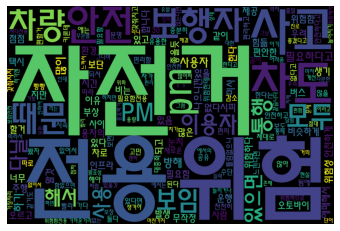

In [187]:
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = okt.morphs(text)

print("[Hannanum 함수]")
찬성4 = hannanum.morphs(찬성)
print(hannanum.morphs(찬성))
text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="black",#colormap = "Accent_r" 
                  width=3000, height=2000)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()

[('위험', 15), ('전용', 13), ('안전', 11), ('자전거', 9), ('필요', 8), ('아서', 7), ('사고', 7), ('다고', 6), ('다니', 6), ('보행자', 6), ('때문', 5), ('pm', 5), ('사용자', 5), ('모두', 4), ('차량', 4), ('어서', 4), ('이용자', 4), ('으면', 4), ('통행', 4), ('생기', 4), ('차도', 4), ('PM', 4), ('편리', 3), ('사용', 3), ('갖추', 3), ('지만', 3), ('위험도', 3), ('방해', 3), ('시간', 3), ('많이', 3), ('위하', 3), ('위험성', 2), ('주행', 2), ('아야', 2), ('사이', 2), ('인프라', 2), ('ㄴ다', 2), ('느끼', 2), ('ㄴ다면', 2), ('이유', 2), ('눈치', 2), ('가보', 2), ('발생', 2), ('사람', 2), ('ㄴ데', 2), ('같이', 2), ('ㅂ니다', 2), ('다시피', 2), ('오토바이', 2), ('비슷', 2), ('부상', 2), ('우려', 2), ('운행자', 2), ('편안', 2), ('환경', 2), ('제공', 2), ('어야', 2), ('ㄴ다고', 2), ('일반', 2), ('달리', 2), ('점점', 2), ('오르', 2), ('버스', 2), ('애매', 2), ('할거', 2), ('보다', 2), ('작정', 2), ('보임', 2), ('해서', 2), ('너무', 2), ('으므로', 1), ('새롭', 1), ('다면', 1), ('보도', 1), ('천천히', 1), ('분명', 1), ('공유', 1), ('ㄴ다는', 1), ('유용', 1), ('이동수', 1), ('단임', 1), ('틀림없', 1), ('으나', 1), ('제대로', 1), ('고민', 1), ('충분히', 1), ('편의', 1), ('감소', 1), ('대중', 

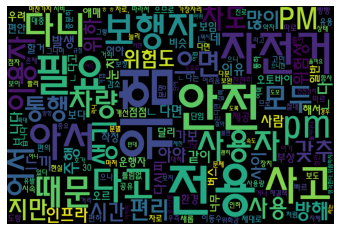

In [188]:
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = komoran.morphs(text)

text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="black",#colormap = "Accent_r" 
                  width=3000, height=2000)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()

[('전용도로', 8), ('자전거', 6), ('어서', 5), ('ㄴ다', 5), ('pm', 5), ('모두', 4), ('이용자', 4), ('필요', 4), ('다니', 4), ('으면', 4), ('생기', 4), ('보행자', 4), ('PM', 4), ('사용', 3), ('갖추', 3), ('안전', 3), ('위험', 3), ('때문', 3), ('어야', 3), ('방해', 3), ('위하', 3), ('위험성', 2), ('편리', 2), ('사이', 2), ('인프라', 2), ('ㄴ다면', 2), ('이유', 2), ('사람', 2), ('통행', 2), ('ㅂ니다', 2), ('없다시피하', 2), ('오토바이사고', 2), ('비슷', 2), ('부상', 2), ('우려', 2), ('차량', 2), ('운행자', 2), ('편안', 2), ('환경', 2), ('제공', 2), ('사고', 2), ('점점', 2), ('오르', 2), ('버스', 2), ('시간', 2), ('애매해서', 2), ('미사용자', 2), ('으므로', 1), ('새롭', 1), ('도로가필요함전용도로', 1), ('다면', 1), ('보도', 1), ('천천히', 1), ('주행해야해서차량', 1), ('힘듦분명', 1), ('공유', 1), ('ㄴ다는', 1), ('유용', 1), ('이동수단', 1), ('에는', 1), ('틀림없', 1), ('으나', 1), ('제대로', 1), ('고민', 1), ('충분히', 1), ('느끼', 1), ('눈치가보', 1), ('편의', 1), ('발생', 1), ('감소많은', 1), ('대중화됨', 1), ('따르', 1), ('같다위험빨라봤자', 1), ('시속30키론데', 1), ('차로로가다보', 1), ('빵빵되서차도랑', 1), ('둘다', 1), ('위험한데', 1), ('따로', 1), ('편할거같기', 1), ('겠다', 1), ('개선', 1), ('통하', 1), ('습니다', 1)

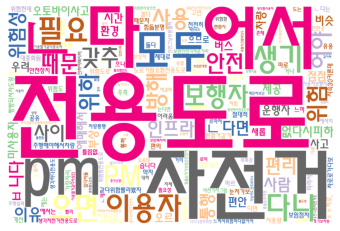

In [189]:
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = hannanum.morphs(text)

text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="white",colormap = "Accent_r", 
                  width=3000, height=2000)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()

[('차도', 1), ('모두', 1), ('위험성', 1), ('필요', 1), ('용도', 1), ('안전', 1), ('편리', 1), ('보도', 1), ('주행', 1), ('차량', 1), ('자전거', 1), ('사용', 1), ('분명', 1), ('유용', 1), ('이동', 1), ('이동수단임', 1), ('수단', 1), ('인프라', 1), ('고민', 1), ('안전하다', 1), ('하다', 1), ('이유', 1), ('눈치', 1), ('보임', 1), ('이용자', 1), ('편의', 1), ('사고', 1), ('발생', 1), ('감소', 1), ('사람', 1), ('대중화', 1), ('위험', 1), ('시속30키론', 1), ('30', 1), ('키론', 1), ('차로', 1), ('차가', 1), ('전용', 1), ('전용도로', 1), ('개선', 1), ('통행', 1), ('위험도로', 1), ('절대적', 1), ('약자', 1), ('때문', 1), ('필요하다', 1), ('안전장치', 1), ('장치', 1), ('오토바이', 1), ('오토바이사고', 1), ('부상', 1), ('우려', 1), ('보행자', 1), ('운행자', 1), ('행자', 1), ('편안', 1), ('환경', 1), ('제공', 1), ('보임점차', 1), ('점차', 1), ('사용량', 1), ('위험도', 1), ('때문차도', 1), ('우측', 1), ('가장자리', 1), ('이용하기', 1), ('하기', 1), ('어려움', 1), ('있음', 1), ('생각자전거전용도로', 1), ('보장', 1), ('보장차도', 1), ('차량통행', 1), ('방해', 1), ('현실', 1), ('일반', 1), ('용도로', 1), ('생각하다전용도로', 1), ('필요성', 1), ('위험하다', 1), ('마찬가지', 1), ('사용자', 1), ('사용자보행자', 1), ('진로', 1), ('존재'

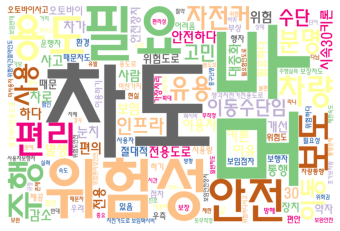

In [190]:
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = kkma.nouns(text)

text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="white",colormap = "Accent_r", 
                  width=3000, height=2000)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()

[('위험', 9), ('전용', 9), ('차도', 8), ('사고', 8), ('안전', 7), ('보행자', 6), ('차량', 5), ('때문', 5), ('모두', 4), ('보임', 4), ('이용자', 4), ('통행', 4), ('사용', 3), ('방해', 3), ('사용자', 3), ('위험성', 2), ('주행', 2), ('사이', 2), ('인프라', 2), ('이유', 2), ('눈치', 2), ('발생', 2), ('사람', 2), ('차로', 2), ('오토바이', 2), ('부상', 2), ('우려', 2), ('생기', 2), ('운행', 2), ('환경', 2), ('제공', 2), ('택시', 2), ('점점', 2), ('버스', 2), ('시간', 2), ('무작정', 2), ('미사', 2), ('보도', 1), ('분명', 1), ('공유', 1), ('수단', 1), ('제대로', 1), ('고민', 1), ('편의', 1), ('감소', 1), ('대중화', 1), ('시속', 1), ('키론데', 1), ('빵빵', 1), ('길이', 1), ('개선', 1), ('통해', 1), ('절대', 1), ('약자', 1), ('이기', 1), ('치가', 1), ('점차', 1), ('용량', 1), ('우측', 1), ('가장자리', 1), ('어려움', 1), ('따라서', 1), ('보장', 1), ('거의', 1), ('현실', 1), ('필요성', 1), ('마찬가지', 1), ('진로', 1), ('존재', 1), ('자체', 1), ('위화', 1), ('유발', 1), ('실력', 1), ('보완', 1), ('대한', 1), ('해결', 1), ('무분별', 1), ('문제', 1), ('상태', 1), ('편리', 1), ('가보', 1), ('장치', 1), ('단어', 1), ('일반', 1), ('반대', 1), ('어차피', 1), ('확대', 1), ('라면', 1), ('위럼', 1), 

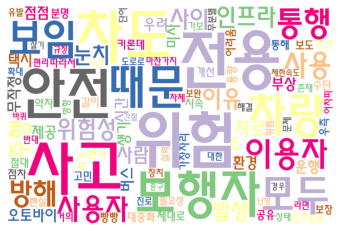

In [191]:
text_file = okt.nouns(text)

text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지", "자전거",
             ""]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="white",colormap = "Accent_r", 
                  width=3000, height=2000)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()

[('위험', 15), ('전용', 13), ('안전', 11), ('자전거', 9), ('필요', 8), ('사고', 7), ('보행자', 6), ('때문', 5), ('사용자', 5), ('차량', 4), ('이용자', 4), ('통행', 4), ('차도', 4), ('편리', 3), ('사용', 3), ('모두', 3), ('위험도', 3), ('방해', 3), ('시간', 3), ('위험성', 2), ('주행', 2), ('사이', 2), ('인프라', 2), ('이유', 2), ('눈치', 2), ('가보', 2), ('발생', 2), ('사람', 2), ('오토바이', 2), ('부상', 2), ('우려', 2), ('운행자', 2), ('편안', 2), ('환경', 2), ('제공', 2), ('일반', 2), ('버스', 2), ('할거', 2), ('작정', 2), ('보임', 2), ('해서', 2), ('보도', 1), ('공유', 1), ('이동수', 1), ('단임', 1), ('고민', 1), ('편의', 1), ('감소', 1), ('대중', 1), ('시속', 1), ('차로', 1), ('도랑', 1), ('개선', 1), ('절대', 1), ('약자', 1), ('이기', 1), ('장치', 1), ('사용량', 1), ('우측', 1), ('가장자리', 1), ('어려움', 1), ('보장', 1), ('현실', 1), ('마찬가지', 1), ('진로', 1), ('존재', 1), ('자체', 1), ('위화감', 1), ('유발', 1), ('실력', 1), ('보완', 1), ('거리', 1), ('함사', 1), ('해결책', 1), ('분별', 1), ('있다', 1), ('문제', 1), ('상태', 1), ('인하', 1), ('여택', 1), ('시비', 1), ('중요', 1), ('성안', 1), ('호가', 1), ('보차', 1), ('안전장치', 1), ('택시', 1), ('단어', 1), ('반대', 

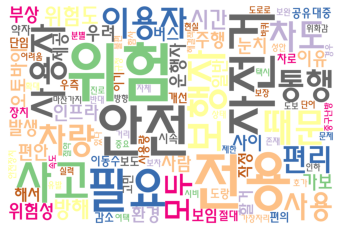

In [192]:
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = komoran.nouns(text)

text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="white",colormap = "Accent_r", 
                  width=3000, height=2000)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()

[('전용도로', 8), ('자전거', 6), ('이용자', 4), ('필요', 4), ('보행자', 4), ('사용', 3), ('안전', 3), ('위험', 3), ('때문', 3), ('모두', 3), ('방해', 3), ('위험성', 2), ('편리', 2), ('사이', 2), ('인프라', 2), ('이유', 2), ('사람', 2), ('통행', 2), ('없다시피하', 2), ('오토바이사고', 2), ('비슷', 2), ('부상', 2), ('우려', 2), ('차량', 2), ('운행자', 2), ('편안', 2), ('환경', 2), ('제공', 2), ('사고', 2), ('버스', 2), ('시간', 2), ('애매해서', 2), ('미사용자', 2), ('도로가필요함전용도로', 1), ('보도', 1), ('주행해야해서차량', 1), ('힘듦분명', 1), ('공유', 1), ('유용', 1), ('이동수단', 1), ('고민', 1), ('눈치가보', 1), ('편의', 1), ('발생', 1), ('감소많은', 1), ('대중화됨', 1), ('같다위험빨라봤자', 1), ('시속30키론데', 1), ('차로로가다보', 1), ('빵빵되서차도랑', 1), ('둘다', 1), ('위험한데', 1), ('편할거같기', 1), ('개선', 1), ('ㅎㅎ차로,', 1), ('위험도로', 1), ('절대적', 1), ('약자', 1), ('안전장치', 1), ('보임점차', 1), ('사용량', 1), ('위험도', 1), ('때문차', 1), ('우측', 1), ('가장자리', 1), ('어려움', 1), ('생각자전거전용도로', 1), ('보장차', 1), ('차량통행', 1), ('만한곳', 1), ('거의', 1), ('현실일반차도', 1), ('위험함전용도로', 1), ('생각하다전용도', 1), ('필요성', 1), ('느껴서위험하다없어서', 1), ('위험함차도', 1), ('위험함', 1), ('마찬가지그럼', 1), ('있음

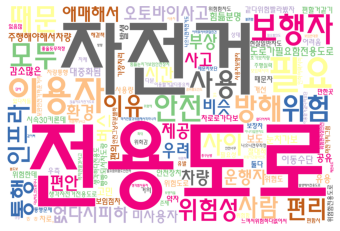

In [193]:
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = hannanum.nouns(text)

text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="white",colormap = "Accent_r", 
                  width=3000, height=2000)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()

In [194]:
# Okt 사전 추가 방법 알아보기 


In [195]:
text

'인도와 차도 모두 위험성이 있으므로 새로운 도로가필요함전용도로가 있다면 더 안전하고 편리할 것 같다.보도에서도 천천히 주행해야해서차량과 자전거 사이라 도로 사용 힘듦분명 공유한다는 점에서 편리하고 유용한 이동수단임에는 틀림없으나 인프라가 제대로 갖춰지지 않아 이용에 있어서 고민된다. 인프라가 갖춰지고 충분히 안전하다고 느낀다면 이용하지 않을 이유가 없다고 생각한다.눈치가보임 이용자 편의와 사고 발생 감소많은 사람들이 이용하고 대중화됨에 따라 필요할 것 같다위험빨라봤자 시속30키론데 차로로가다보면 차가 뒤에서 빵빵되서차도랑 인도 둘다 위험한데 따로 다닐 길이 있으면 편할거같기도 함있으면 좋겠다고 생각하지만 자전거 전용도로의 개선을 통해서 같이 사용할 수 있을것같습니다 ㅎㅎ차로, 인도 통행 위험하므로.위험도로에서는 절대적 약자이기 때문에 필요하다고 생각합니다.안전장치가 없다시피하기 때문에 오토바이사고와 비슷하게 큰 부상을 입을 우려가 큼\n전용도로가 생기면 보행자, pm이용자, 차량 운행자 모두에게 편안한 도로 환경을 제공할 수 있을 것으로 보임점차 사용량이 많아져 위험도가 높아지기 때문차도 우측 가장자리는 pm으로 이용하기엔 어려움이 있음. 따라서 자전거 도로를 늘리거나 pm전용도로가 생겨야 한다고 생각자전거전용도로처럼 안전한 이용 보장차도는 차량통행에 방해되고 인도는 사람의 통행에 방해되고 그나마 다닐 만한곳이 자전거 도로인데 그 자전거 도로마저 거의없는 것이 현실일반차도에서의 사고를 줄일 수 있다.전용도로를 이용하지 않는다면 pm 이용자와 보행자 모두에게 위험함전용도로가 필요하다고 생각하다전용도로 필요성을 느껴서위험하다없어서 위험함차도는 위험함 인도도 마찬가지그럼 더 빨리 달릴 수 있음많은 사용자보행자의 진로 방해, 존재 자체가 보행자에게 위화감 유발, PM 주행실력 보완안전가까운거리 이용하기 편함사고 위험성이 다분한 PM 이용에 대한 해결책이라고 생각합니다. 안전그냥무분별하게 인도를 이용해서 사고의 위험이 있다차들의 통행문제와 도로의 상태로 인하여택시비는

[('위험', 17), ('전용도로', 12), ('안전', 9), ('차도', 8), ('자전거', 8), ('사고', 7), ('보행자', 6), ('차량', 5), ('때문', 5), ('사용자', 5), ('모두', 4), ('이용자', 4), ('통행', 4), ('요하', 4), ('편리', 3), ('사용', 3), ('전하', 3), ('가보', 3), ('필요', 3), ('보임', 3), ('방해', 3), ('시간', 3), ('위험성', 2), ('주행', 2), ('사이', 2), ('인프라', 2), ('어서', 2), ('이유', 2), ('눈치', 2), ('발생', 2), ('사람', 2), ('차로', 2), ('각하', 2), ('장치', 2), ('다시피', 2), ('오토바이', 2), ('부상', 2), ('우려', 2), ('생기', 2), ('운행', 2), ('편안', 2), ('환경', 2), ('제공', 2), ('일반', 2), ('다차', 2), ('점점', 2), ('버스', 2), ('애매', 2), ('무작정', 2), ('보도', 1), ('분명', 1), ('공유', 1), ('유용', 1), ('이동수단', 1), ('틀림', 1), ('제대로', 1), ('지지', 1), ('고민', 1), ('지고', 1), ('충분', 1), ('편의', 1), ('감소', 1), ('대중화', 1), ('시속', 1), ('키론데', 1), ('빵빵', 1), ('길이', 1), ('기도', 1), ('개선', 1), ('통해', 1), ('절대', 1), ('약자', 1), ('이기', 1), ('점차', 1), ('용량', 1), ('아지', 1), ('우측', 1), ('가장자리', 1), ('어려움', 1), ('따라서', 1), ('거나', 1), ('자전거전용도로', 1), ('보장', 1), ('그나', 1), ('마저', 1), ('거의', 1), ('현실', 1), ('필요성', 1), ('

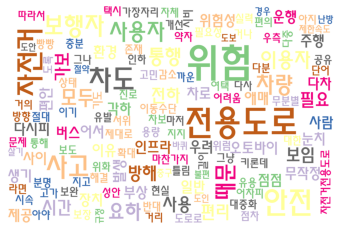

In [196]:
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)

text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="white",colormap = "Accent_r", 
                  width=3000, height=2000)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()

In [197]:
전용도로찬성 = df_이용자.loc[df_이용자['PM전용도로찬/반'] == '찬성']['전용도로찬/반_이유']

In [198]:
전용도로반대 = df_이용자.loc[df_이용자['PM전용도로찬/반'] == '반대']['전용도로찬/반_이유']

In [199]:
전용도로찬성 = ''.join(전용도로찬성)

In [200]:
전용도로반대 = 전용도로반대.astype('str')

In [201]:
전용도로반대 = ''.join(전용도로반대)

In [202]:
이용자_image = np.array(Image.open('C:/Users/user/Desktop/킥보드.png'))

In [234]:
colormap = []
for i in range(100):
    if i <= 20:
        colormap.append('Red')
    elif i <=40:
        colormap.append('Pink')
    else:
        colormap.append('White')

In [203]:
text = 전용도로찬성

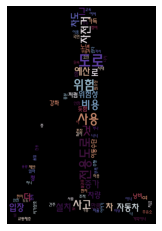

In [303]:
name = "이용자_전용도로찬성"
colormap = "twilight_shifted"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_image)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자{name}_{colormap}.jpg')

#####  Colormap종류
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


In [304]:
text = 전용도로반대

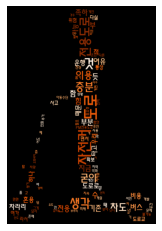

In [307]:
name = "이용자_전용도로반대"
colormap = "Oranges"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_image)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자{name}_{colormap}.jpg')

In [309]:
남자찬성 = df_이용자.loc[(df_이용자['성별'] == '남자') & (df_이용자['PM전용도로찬/반'] == '찬성')]['전용도로찬/반_이유']
남자반대 = df_이용자.loc[(df_이용자['성별'] == '남자') & (df_이용자['PM전용도로찬/반'] == '반대')]['전용도로찬/반_이유']
여자찬성 = df_이용자.loc[(df_이용자['성별'] == '여자') & (df_이용자['PM전용도로찬/반'] == '찬성')]['전용도로찬/반_이유']
여자반대 = df_이용자.loc[(df_이용자['성별'] == '여자') & (df_이용자['PM전용도로찬/반'] == '반대')]['전용도로찬/반_이유']

In [311]:
남자찬성 = ''.join(남자찬성)
남자반대 = 남자반대.astype('str')
남자반대 = ''.join(남자반대)
여자찬성 = ''.join(여자찬성)
여자반대 = ''.join(여자반대)

In [317]:
text = 남자찬성

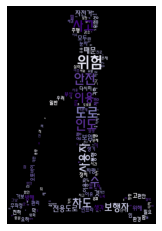

In [318]:
name = "이용자_전용도로남자찬성"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_image)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')


In [3]:
name = "이현진"
number = 1 
print("{}은 {} 번입니다".format(name,number))

이현진은 1 번입니다


In [ ]:
f"{}은 {}번입니다"

In [319]:
text = 남자반대

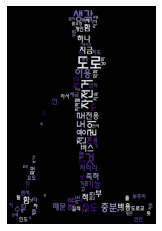

In [320]:
name = "이용자_전용도로남자반대"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_image)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')

In [321]:
text = 여자찬성

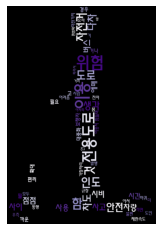

In [322]:
name = "이용자_전용도로여자찬성"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_image)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')

In [323]:
text = 여자반대

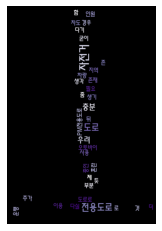

In [324]:
name = "이용자_전용도로여자반대"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_image)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')

In [328]:
# 사고경험, 사고경험x -> 의견차이 비교 
df_이용자['PM사고경험'] = 0 
df_이용자.loc[df_이용자['PM사고'] == '예', 'PM사고경험'] = 1 
df_이용자.loc[df_이용자['PM아차사고'] == '예', 'PM사고경험'] = 1 

In [331]:
PM사고 = df_이용자.loc[df_이용자['PM사고경험'] == 1]['전용도로찬/반_이유']
PM사고X = df_이용자.loc[df_이용자['PM사고경험'] == 0]['전용도로찬/반_이유']

In [335]:
PM사고 = ''.join(PM사고)
PM사고X = PM사고X.astype('str') 
PM사고X = ''.join(PM사고X)

In [336]:
text = PM사고

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


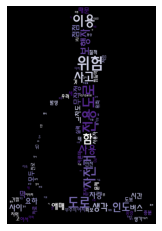

In [337]:
name = "이용자_사고경험자_전용도로의견"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_image)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')

In [338]:
text = PM사고X 

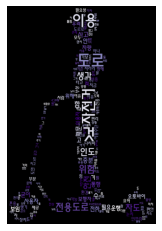

In [339]:
name = "이용자_사고경험X_전용도로의견"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_image)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')

### 보행자

In [340]:
보행자_mask = np.array(Image.open('C:/Users/user/Desktop/보행자4.png'))

In [341]:
보행자여자_mask = np.array(Image.open('C:/Users/user/Desktop/보행자_여자.png'))

In [342]:
df_보행자 = pd.read_csv(path + '보행자_최종본.csv', encoding = 'CP949')

In [343]:
보행자찬성 = df_보행자.loc[df_보행자['PM전용도로찬/반'] == '찬성']['전용도로찬/반_이유']
보행자반대 = df_보행자.loc[df_보행자['PM전용도로찬/반'] == '반대']['전용도로찬/반_이유']

[('사고', 17), ('보행자', 9), ('위험', 8), ('안전', 7), ('보도', 6), ('도보', 5), ('구분', 4), ('가능성', 4), ('운전자', 4), ('위험성', 4), ('크게', 4), ('노출', 4), ('사람', 4), ('사용자', 4), ('문제', 4), ('필요성', 2), ('이외', 2), ('모두', 2), ('고려', 2), ('개발', 2), ('찬성', 2), ('의견', 2), ('타고', 2), ('거의', 2), ('보기', 2), ('예상', 2), ('편리', 2), ('안전성', 2), ('보장', 2), ('서로', 2), ('수단', 2), ('하나', 2), ('주변', 2), ('지인', 2), ('결과', 2), ('적지', 2), ('부상', 2), ('정도', 2), ('혼잡', 2), ('야기', 2), ('개선', 2), ('생기', 2), ('제대로', 2), ('사용', 2), ('출퇴근', 2), ('용이', 2), ('요즘', 2), ('주차장', 2), ('부족', 2), ('추후', 2), ('서비스', 2), ('개인', 2), ('활성화', 2), ('자가용', 2), ('이용자', 2), ('점점', 2), ('그것', 2), ('수용', 2), ('고라니', 2), ('미사', 2), ('어차피', 1), ('확대', 1), ('라면', 1), ('위럼', 1), ('방향', 1), ('도로로', 1), ('발생', 1), ('제한속도', 1), ('규정', 1), ('간절', 1), ('경우', 1), ('중구', 1), ('난방', 1), ('바퀴', 1), ('살기', 1)]


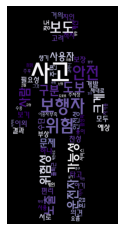

In [347]:
name = "보행자_찬성"
text = 보행자찬성
text =''.join(text)

twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = okt.nouns(text)

text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지", "자전거", "전용", 
             "차도", "때문", "부분", "지금", "인원", "다른", "실질"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="black",colormap = "Purples", 
                  width=3000, height=2000, mask = 보행자_mask)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/보행자/{name}_{colormap}.jpg')

[('세금', 6), ('낭비', 6), ('설치', 4), ('활용', 4), ('기존', 3), ('개인', 3), ('둘째', 2), ('일반', 2), ('보행자', 2), ('가능성', 2), ('농후', 2), ('대한민국', 2), ('여기저기', 2), ('행자', 2), ('어디가', 2), ('필요성', 2), ('극히', 2), ('형태', 2), ('보편', 2), ('사람', 2), ('제대로', 2), ('투자', 2), ('가치', 2), ('혈세', 2), ('자체', 2), ('이동', 2), ('수단', 2), ('인프라', 2), ('가능', 2), ('확대', 2), ('보급', 2), ('공유', 2), ('위험', 2), ('도로로', 2), ('고로', 2), ('어차피', 2), ('자기', 2), ('산차', 1), ('버스', 1), ('운행', 1), ('차량', 1), ('혼란', 1), ('오토바이', 1), ('우려', 1), ('존재', 1), ('함안', 1), ('사용', 1), ('안전', 1), ('부주의', 1), ('사고', 1), ('다수', 1)]


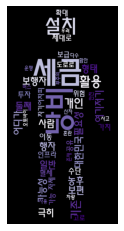

In [348]:
name = "보행자_반대"
text = 보행자반대
text =''.join(text)
colormap = "Accent_r"

twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)

text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지", "자전거", "전용", 
             "차도", "때문", "부분", "지금", "인원", "다른", "실질"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="white",colormap = colormap, 
                  width=3000, height=2000, mask = 보행자_mask)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/보행자/{name}_{colormap}.jpg')

### 운전자

In [290]:
운전자_mask = np.array(Image.open('C:/Users/user/Desktop/자동차.png'))

In [291]:
df_운전자 = pd.read_csv(path + '운전자_최종본.csv', encoding = 'cp949')

In [292]:
운전자찬성 = df_운전자.loc[df_운전자['PM전용도로찬/반'] == '찬성']['전용도로찬/반_이유']
운전자반대 = df_운전자.loc[df_운전자['PM전용도로찬/반'] == '반대']['전용도로찬/반_이유']

[('사고', 20), ('안전', 13), ('위험', 11), ('자동차', 5), ('운행', 5), ('수단', 5), ('위험성', 5), ('오토바이', 4), ('방지', 4), ('운전', 3), ('운전자', 3), ('운용', 3), ('사람', 3), ('교통사고', 3), ('법규', 3), ('감소', 3), ('개인', 3), ('구분', 2), ('달리', 2), ('따라서', 2), ('차이', 2), ('금도', 2), ('보행자', 2), ('모두', 2), ('필요성', 2), ('준수', 2), ('차량', 2), ('거리', 2), ('이동', 2), ('교통', 2), ('안정', 1), ('교통법규', 1), ('난폭운전', 1), ('자격', 1), ('요구', 1), ('비견', 1), ('보드', 1), ('운동신경', 1), ('움직임', 1), ('확연', 1), ('리그', 1), ('보고', 1), ('주행', 1), ('고시', 1), ('적용', 1), ('법도', 1), ('상황', 1), ('다운', 1), ('전자', 1), ('서로', 1), ('보장', 1), ('빈번', 1), ('당황', 1), ('보호', 1), ('대상', 1), ('각자', 1), ('개개인', 1), ('경우', 1), ('노출', 1), ('속력', 1), ('자주', 1), ('다사', 1), ('보도', 1), ('접촉', 1), ('중상', 1), ('우려', 1), ('순환', 1), ('확률', 1), ('인구', 1), ('무방비', 1), ('상태', 1), ('계해', 1), ('예방', 1), ('자유', 1), ('생기', 1), ('발생', 1), ('도로로', 1), ('함안', 1), ('전하', 1), ('분리', 1), ('저변', 1), ('확대', 1), ('취급', 1), ('인프라', 1), ('인식', 1), ('공유', 1), ('편리', 1), ('개방', 1), ('이기', 

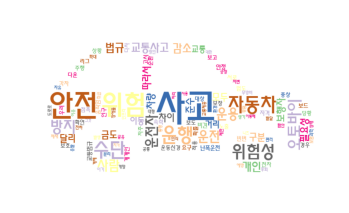

In [293]:
text = 운전자찬성
text = text.astype('str')
text =''.join(text)

twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = okt.nouns(text)

text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지", "자전거", "전용", 
             "차도", "때문", "부분", "지금", "인원", "다른", "실질"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="white",colormap = "Accent_r", 
                  width=3000, height=2000, mask = 운전자_mask)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()

[('도로', 11), ('전용', 5), ('사용', 4), ('차도', 3), ('비용', 3), ('자전거', 3), ('사고', 3), ('차량', 2), ('예산', 2), ('입장', 2), ('자동차', 2), ('위험', 2), ('위험성', 2), ('증가', 2), ('설치', 2), ('자율', 1), ('주행', 1), ('허용', 1), ('시대', 1), ('현재', 1), ('용량', 1), ('현저', 1), ('지금', 1), ('유차', 1), ('주유소', 1), ('이야기', 1), ('듯함', 1), ('도로로', 1), ('교통체증', 1), ('가중', 1), ('정비', 1), ('낭비', 1), ('무법자', 1), ('단속', 1), ('길이', 1), ('사람', 1), ('율일', 1), ('커서', 1), ('충분', 1), ('요인', 1), ('국민', 1), ('얼마', 1), ('안함', 1), ('가뜩이나', 1), ('보조', 1), ('수단', 1), ('필요성', 1), ('시기상조', 1), ('간주', 1), ('제반', 1), ('한지', 1), ('교육', 1), ('부족', 1), ('노년', 1), ('안전', 1), ('불감증', 1)]


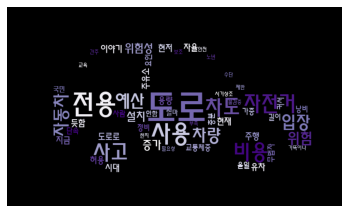

In [300]:
text = 운전자반대
text = text.astype('str')
text =''.join(text)

twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)

text_text_file = []
for i in text_file:
    if len(i) == 1:
        continue
    else:
        text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = "Purples", 
                  width=3000, height=2000, mask = 운전자_mask)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()

In [298]:
cloud.to_file('C:/Users/user/Desktop/운전자.jpg')